In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

df_sessions = pd.read_csv('sessions.csv')


df_sessions.head()


,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [89]:
print("We have", df_sessions.shape[0], "Session Records for" , df_sessions.user_id.nunique() , "users." )

We have 10567737 Session Records for 135483 users.


In [90]:
#Checking null values
display(df_sessions.isnull().sum())

user_id            34496
action             79626
action_type      1126204
action_detail    1126204
device_type            0
secs_elapsed      136031
dtype: int64

In [91]:
# Checking unknowns
df_sessions.action_type.unique()

array([nan, 'click', 'data', 'view', 'submit', 'message_post',
       '-unknown-', 'booking_request', 'partner_callback',
       'booking_response', 'modify'], dtype=object)

In [92]:
df_sessions['action'] = df_sessions['action'].replace('-unknown-', np.nan)
df_sessions['action_type'] = df_sessions['action_type'].replace('-unknown-', np.nan)
df_sessions['action_detail'] = df_sessions['action_detail'].replace('-unknown-', np.nan)

In [93]:
df_sessions.action.value_counts().head(10)

show                     2768278
index                     843699
search_results            725226
personalize               706824
search                    536057
ajax_refresh_subtotal     487744
update                    365130
similar_listings          364624
social_connections        339000
reviews                   320591
Name: action, dtype: int64

In [94]:
df_sessions.action_type.value_counts().head(10)

view                3560902
data                2103770
click               1996183
submit               623357
message_post          87103
partner_callback      19132
booking_request       18773
modify                 1139
booking_response          4
Name: action_type, dtype: int64

In [95]:
df_sessions.action_detail.value_counts().head(10)

view_search_results            1776885
p3                             1376550
wishlist_content_update         706824
user_profile                    656839
change_trip_characteristics     487744
similar_listings                364624
user_social_connections         336799
update_listing                  269779
listing_reviews                 269021
dashboard                       152952
Name: action_detail, dtype: int64

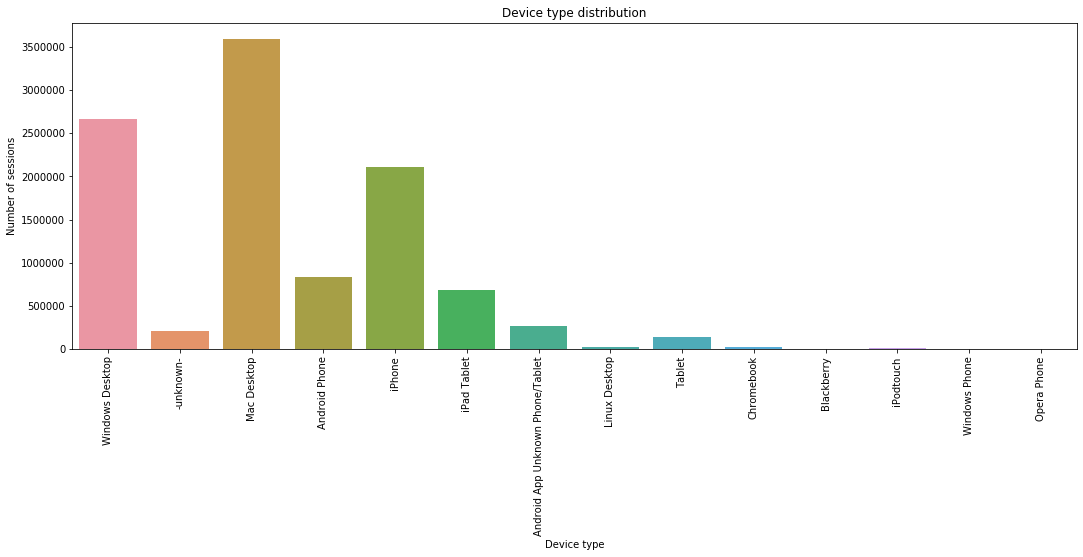

In [96]:
plt.figure(figsize=(18,6))
sns.countplot(x='device_type', data=df_sessions)
plt.xlabel('Device type')
plt.ylabel('Number of sessions')
plt.title('Device type distribution')
plt.xticks(rotation=90)
plt.show()

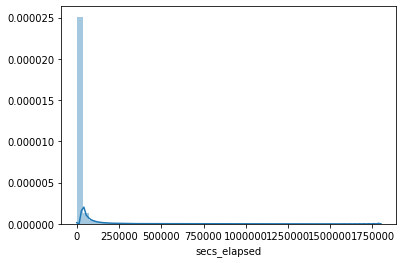

In [97]:
sns.distplot(df_sessions[df_sessions['secs_elapsed'].notnull()]['secs_elapsed'])

In [98]:
df_sessions['secs_elapsed'].describe()


count    1.043171e+07
mean     1.940581e+04
std      8.888424e+04
min      0.000000e+00
25%      2.290000e+02
50%      1.147000e+03
75%      8.444000e+03
max      1.799977e+06
Name: secs_elapsed, dtype: float64

### The average number of seconds per session = 19405 seconds
### The Median = 1147

In [99]:
len(df_sessions[df_sessions['secs_elapsed'].isnull()])

136031

### Fill the empty values whith the median of the distribution

In [100]:
median_secs = df_sessions['secs_elapsed'].median()
df_sessions['secs_elapsed'] = df_sessions['secs_elapsed'].fillna(median_secs)

In [101]:
df_sessions['secs_elapsed'].describe()

count    1.056774e+07
mean     1.917078e+04
std      8.833430e+04
min      0.000000e+00
25%      2.370000e+02
50%      1.147000e+03
75%      8.193000e+03
max      1.799977e+06
Name: secs_elapsed, dtype: float64

In [102]:
null_action = df_sessions[(df_sessions['action_type'].isnull()) | (df_sessions['action_detail'].isnull()) | (df_sessions['action'].isnull()) ]
null_action.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0
6,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,115.0
9,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,683.0


In [103]:
null_action.shape

(2237000, 6)

In [104]:
len(null_action['action'].drop_duplicates())


270

In [105]:
df_sessions[df_sessions['device_type'].isnull()]


,user_id,action,action_type,action_detail,device_type,secs_elapsed


In [106]:
df_sessions['device_type'] = df_sessions['device_type'].replace('-unknown-', np.nan)
df_sessions['device_type'].value_counts()


Mac Desktop                         3594286
Windows Desktop                     2658539
iPhone                              2105031
Android Phone                        839637
iPad Tablet                          683414
Android App Unknown Phone/Tablet     273652
Tablet                               139886
Linux Desktop                         28373
Chromebook                            22348
iPodtouch                              8198
Windows Phone                          2047
Blackberry                              979
Opera Phone                              68
Name: device_type, dtype: int64

In [107]:
len(df_sessions[df_sessions['device_type'].isnull()])


211279

In [108]:
#First we rename the column user_id as just id to match the train and test columns
df_sessions.rename(columns = {'user_id': 'id'}, inplace=True)


In [109]:
print("There were", len(df_sessions.id.unique()),"unique user ids in the sessions data.")

There were 135484 unique user ids in the sessions data.


In [ ]:

action_count = df_sessions.groupby(['id', 'action'])['secs_elapsed'].agg(len).unstack()
action_type_count = df_sessions.groupby(['id', 'action_type'])['secs_elapsed'].agg(len).unstack()
action_detail_count = df_sessions.groupby(['id', 'action_detail'])['secs_elapsed'].agg(len).unstack()
device_type_sum = df_sessions.groupby(['id', 'device_type'])['secs_elapsed'].agg(sum).unstack()
sessions_data = pd.concat([action_count, action_type_count, action_detail_count, device_type_sum],axis=1)
sessions_data.columns = sessions_data.columns.map(lambda x: str(x) + '_count')
# Most used device
sessions_data['most_used_device'] = df_sessions.groupby('id')['device_type'].max()
print('There were', df_sessions.shape[0], 'recorded sessions in which there were', df_sessions.id.nunique(), 'unique users.')

In [111]:
secs_elapsed = df_sessions.groupby('id')['secs_elapsed']
secs_elapsed = secs_elapsed.agg(
    {
        'secs_elapsed_sum': np.sum,
        'secs_elapsed_mean': np.mean,
        'secs_elapsed_min': np.min,
        'secs_elapsed_max': np.max,
        'secs_elapsed_median': np.median,
        'secs_elapsed_std': np.std,
        'secs_elapsed_var': np.var,
        'day_pauses': lambda x: (x > 86400).sum(),
        'long_pauses': lambda x: (x > 300000).sum(),
        'short_pauses': lambda x: (x < 3600).sum(),
        'session_length' : np.count_nonzero
    }
)
secs_elapsed.reset_index(inplace=True)
sessions_secs_elapsed = pd.merge(sessions_data, secs_elapsed, on='id', how='left')
df = pd.merge(df, sessions_secs_elapsed, on='id', how = 'left')
print('There are', df.id.nunique(), 'users from the entire user data set that have session information.')

KeyError: 'id'